In [ ]:
import os
os.environ['KAGGLE_USERNAME']="KAGGLE_USERNAME"
os.environ['KAGGLE_KEY']="KAGGLE_KEY"
!kaggle datasets download  tawsifurrahman/covid19-radiography-database

100% 777M/778M [00:38<00:00, 23.5MB/s]
100% 778M/778M [00:38<00:00, 21.2MB/s]


In [ ]:
!unzip covid19-radiography-database.zip

In [ ]:
print(len(os.listdir('COVID-19_Radiography_Dataset/COVID/images')))
len(os.listdir('COVID-19_Radiography_Dataset/Normal/images'))

3616


10192

In [ ]:
import cv2

In [ ]:
img=cv2.imread('COVID-19_Radiography_Dataset/COVID/images/COVID-10.png')


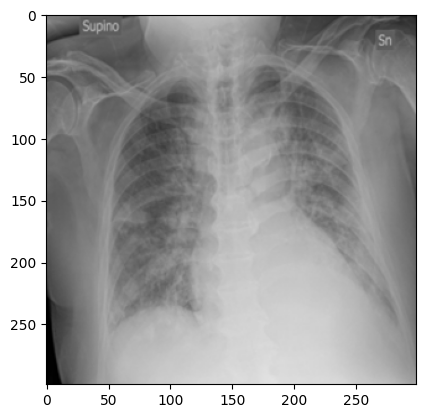

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(img)

In [ ]:
img.shape

(299, 299, 3)

In [ ]:
import numpy as np

import pandas as pd
urls=os.listdir('COVID-19_Radiography_Dataset/COVID/images')
path="COVID-19_Radiography_Dataset/COVID/images" + urls[0]
path

'COVID-19_Radiography_Dataset/COVID/imagesCOVID-2716.png'

In [ ]:
def load_images(path, urls, target):
    images = []
    labels = []

    for i in range(min(3616, len(urls))):
        img_path = os.path.join(path, urls[i])
        img = cv2.imread(img_path)
        img = img / 255.0
        img = cv2.resize(img, (80, 80))
        images.append(img)
        labels.append(target)

    images = np.asarray(images)
    return images, labels



In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
   # rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


In [ ]:
covid_path="COVID-19_Radiography_Dataset/COVID/images"
covid_url=os.listdir(covid_path)
covidimages , covidtargets = load_images(covid_path, covid_url, 1)
print(len(covid_url))
len(covidimages)

3616


3616

In [ ]:
normal_path="COVID-19_Radiography_Dataset/Normal/images"
normal_url=os.listdir(normal_path)
normal_images , normal_targets = load_images(normal_path, normal_url, 0)


In [ ]:
print(covidimages.shape)
normal_images.shape


(3616, 80, 80, 3)


(3616, 80, 80, 3)

In [ ]:
#now merging the normal and covid images
data=np.r_[covidimages , normal_images]
targets=np.r_[covidtargets, normal_targets]
print(data.shape)
targets.shape

(7232, 80, 80, 3)


(7232,)

In [ ]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Dropout
from tensorflow.keras.losses import BinaryCrossentropy

In [ ]:
x_train , x_test , y_train, y_test =train_test_split (data, targets, test_size=0.2)

In [ ]:
model= Sequential(
    [
        Conv2D(64,(3,3),input_shape=(80,80,3),activation='relu'),
        MaxPooling2D(),
        Conv2D(64 , (3,3), activation='relu'),
        MaxPooling2D(),
        Conv2D(128 , (3,3), activation='relu'),
        MaxPooling2D(),
        Flatten(),
        Dense(512,activation='relu'),
        Dense(256,activation='relu'),
        Dropout(0.5),
        Dense(1,activation='sigmoid')
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 78, 78, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 39, 39, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 37, 37, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 18, 18, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 8, 8, 128)         0

In [ ]:
model.compile(optimizer='adam', loss='BinaryCrossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, batch_size=32, epochs=15, validation_data=(x_test, y_test))

Epoch 1/15
181/181 [==============================] - 16s 24ms/step - loss: 0.4860 - accuracy: 0.7585 - val_loss: 0.3560 - val_accuracy: 0.8404
Epoch 2/15
181/181 [==============================] - 2s 13ms/step - loss: 0.3160 - accuracy: 0.8688 - val_loss: 0.2475 - val_accuracy: 0.8970
Epoch 3/15
181/181 [==============================] - 2s 12ms/step - loss: 0.2450 - accuracy: 0.9015 - val_loss: 0.2268 - val_accuracy: 0.9088
Epoch 4/15
181/181 [==============================] - 2s 13ms/step - loss: 0.2006 - accuracy: 0.9253 - val_loss: 0.2139 - val_accuracy: 0.9233
Epoch 5/15
181/181 [==============================] - 3s 14ms/step - loss: 0.1563 - accuracy: 0.9411 - val_loss: 0.1715 - val_accuracy: 0.9309
Epoch 6/15
181/181 [==============================] - 3s 15ms/step - loss: 0.1213 - accuracy: 0.9578 - val_loss: 0.1993 - val_accuracy: 0.9261
Epoch 7/15
181/181 [==============================] - 3s 19ms/step - loss: 0.1133 - accuracy: 0.9590 - val_loss: 0.1986 - val_accuracy: 0.937

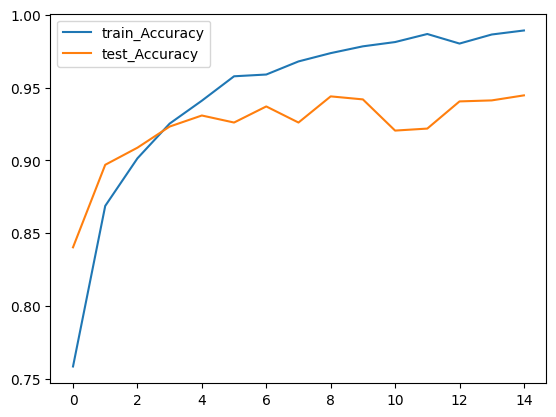

In [ ]:
plt.plot(model.history.history['accuracy'], label='train_Accuracy')
plt.plot(model.history.history['val_accuracy'], label='test_Accuracy')
plt.legend()
plt.show()

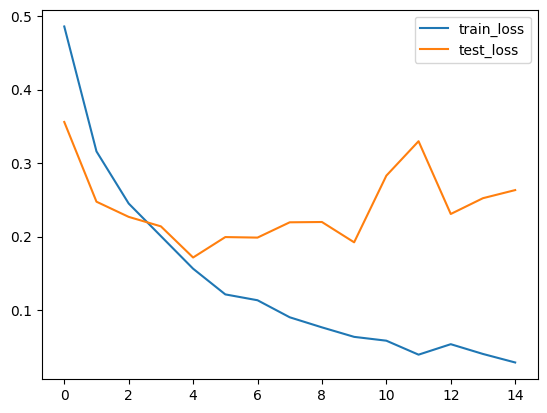

In [ ]:
plt.plot(model.history.history['loss'], label='train_loss')
plt.plot(model.history.history['val_loss'], label='test_loss')
plt.legend()
plt.show()